<a href="https://colab.research.google.com/github/lorenzosquassoni/Programming-Lectures-UNIVR/blob/main/Progetto_Programming_Australia_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Australia weather 2007-2017**

Dataset from https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

* Location: the common name of the location of the weather station
* MinTemp: the minimum temperature in degrees celsius
* MaxTemp: the maximum temperature in degrees celsius
* Rainfall: the amount of rainfall recorded for the day in mm
* Evaporation: evaporation (mm) in the 24 hours to 9am 
* Sunshine: the number of hours of bright sunshine in the day 
* WindGusDir: the direction of the strongest wind gust in the 24 hours to midnight
* WindGuSpeed: the speed (km/h) of the strongest wind gust in the 24 hours to midnight
* WindDir9am: direction of the wind at 9am
* WindDir3pm: direction of the wind at 3pm
* WindSpeed9am: wind speed (km/hr) averaged over 10 minutes prior to 9am
* WindSpeed3pm: wind speed (km/hr) averaged over 10 minutes prior to 3pm
* Humidity9am: humidity (percent) at 9am
* Humidity3pm: humidity (percent) at 3pm
* Pressure9am: atmospheric pressure (hpa) reduced to mean sea level at 9am
* Pressure3pm: atmospheric pressure (hpa) reduced to mean sea level at 3pm
* Cloud9am:  fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many
* Cloud3pm: fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values
* Temp9am: temperature (degrees C) at 9am
* Temp3pm: temperature (degrees C) at 3pm
* RainToday: boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
* RainTomorrow: the amount of next day rain in mm.

In [80]:
import numpy as np
import pandas as pd

In [81]:
#import the dataset and create a dataframe

weather_australia_df=pd.read_csv('weather_australia.csv')

**EXPLORATORY DATA ANALYSIS**

Each data point represents the data on weather for every day from 2007 to 2017 in some Australian cities

In [82]:
weather_australia_df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [83]:
weather_australia_df.tail(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145450,2017-06-16,Uluru,5.2,24.3,0.0,NaN,NaN,E,24.0,SE,...,53.0,24.0,1023.8,1020.0,NaN,NaN,12.3,23.3,No,No
145451,2017-06-17,Uluru,6.4,23.4,0.0,NaN,NaN,ESE,31.0,S,...,53.0,25.0,1025.8,1023.0,NaN,NaN,11.2,23.1,No,No
145452,2017-06-18,Uluru,8.0,20.7,0.0,NaN,NaN,ESE,41.0,SE,...,56.0,32.0,1028.1,1024.3,NaN,7.0,11.6,20.0,No,No
145453,2017-06-19,Uluru,7.4,20.6,0.0,NaN,NaN,E,35.0,ESE,...,63.0,33.0,1027.2,1023.3,NaN,NaN,11.0,20.3,No,No
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [84]:
weather_australia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [85]:
weather_australia_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [86]:
weather_australia_df.shape

(145460, 23)

In [87]:
weather_australia_df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [88]:
#rename all the columns  with all lower case letters, and remove possible empty spaces at the beginning and end od the column name

weather_australia_df.columns= list(map(lambda x:x.lower().strip(), 
weather_australia_df.columns))


weather_australia_df.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windspeed9am', 'windspeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'raintomorrow'],
      dtype='object')

In [89]:
#the database contains data of these cities

weather_australia_df.location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [90]:
len(weather_australia_df.location.unique())

49

In [91]:
#all the cities do not have the same number of weather observations:

weather_australia_df.location.value_counts()

location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown     

The column data is a str type, I cast it in datetime

In [92]:
#this is the old type:

weather_australia_df['date'].dtype


dtype('O')

In [93]:
 weather_australia_df['date']= pd.to_datetime(weather_australia_df['date'], format='%Y-%m-%d')
 weather_australia_df['date']
 

0        2008-12-01
1        2008-12-02
2        2008-12-03
3        2008-12-04
4        2008-12-05
            ...    
145455   2017-06-21
145456   2017-06-22
145457   2017-06-23
145458   2017-06-24
145459   2017-06-25
Name: date, Length: 145460, dtype: datetime64[ns]

In [94]:
 #this is the new type:
 
 weather_australia_df['date'].dtype


dtype('<M8[ns]')

In [95]:
#I change the format from year-month-day to day-month-year and I cast to datetime


weather_australia_df['date']= weather_australia_df['date'].dt.strftime('%d-%m-%Y') 
weather_australia_df['date']= pd.to_datetime(weather_australia_df['date'], format='%d-%m-%Y')


In [96]:
weather_australia_df.head(5)

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,...,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [97]:
#before starting to clean the dataset let's see how many missing values exist in the dataset

weather_australia_df.isnull().sum()

date                 0
location             0
mintemp           1485
maxtemp           1261
rainfall          3261
evaporation      62790
sunshine         69835
windgustdir      10326
windgustspeed    10263
winddir9am       10566
winddir3pm        4228
windspeed9am      1767
windspeed3pm      3062
humidity9am       2654
humidity3pm       4507
pressure9am      15065
pressure3pm      15028
cloud9am         55888
cloud3pm         59358
temp9am           1767
temp3pm           3609
raintoday         3261
raintomorrow      3267
dtype: int64

The number of null values for 'raintoday', indicating weather or not it rained in a specific city,  has the same number of null values as 'rainfall' which measure the quantity of rain in mm during the day. This is consistent since this indicates that the amount of rain that has fallen is not measured if there is no record of whether it rained or not.

In [98]:
#I group the data points by city in order to see if some cities have no data for specific columns.

weather_australia_groupby_city=weather_australia_df.groupby('location').mean(numeric_only=True)
weather_australia_groupby_city

,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustspeed,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm
location,,,,,,,,,,,,,,,,
Adelaide,12.579505,22.898934,1.566354,5.770364,7.747993,36.499211,9.950125,15.471455,59.701066,44.828105,1018.764082,1016.803264,NaN,NaN,16.929046,21.557447
Albany,12.948438,20.070998,2.263859,4.213345,6.657460,NaN,12.503189,18.993498,74.805416,67.407917,1018.275721,1016.497280,5.191539,4.808072,16.236455,18.411555
Albury,9.530604,22.640872,1.914115,NaN,NaN,32.977394,8.211151,14.382965,74.070604,47.869393,1018.369621,1015.760752,6.391001,5.406447,14.361135,21.373780
AliceSprings,13.142284,29.248420,0.882850,9.026832,9.581944,40.531281,14.727452,18.101053,39.690155,24.131466,1016.684732,1012.871913,2.845898,3.251213,21.335658,28.010764
BadgerysCreek,11.131719,24.031208,2.193101,NaN,NaN,33.600409,8.051351,14.005404,76.895770,51.381855,1018.461598,1015.635120,NaN,NaN,16.571698,22.522698
Ballarat,7.367950,18.287266,1.740026,NaN,NaN,44.982719,19.976913,22.766798,81.817820,59.030992,1017.845093,1016.271201,5.797915,6.285643,11.672457,16.788365
Bendigo,8.593713,21.621746,1.619380,3.851730,NaN,38.850000,12.936100,17.159091,70.545664,46.474325,1018.026281,1015.873135,4.400097,4.855379,13.845275,20.249737
Brisbane,16.423807,26.448380,3.144891,5.407940,8.081170,28.212881,6.944236,10.998744,64.043587,53.912209,1018.232989,1015.099278,3.918546,3.879975,21.841173,24.753461
Cairns,21.220467,29.558849,5.742035,6.256891,7.571451,38.031436,15.902929,21.911813,69.936821,61.751645,1014.151333,1011.099441,4.560184,4.445196,25.820105,27.909112


**DATASET CLEANING**

Some columns are not usefull for further data exploration and anlysis, so they are dropped.

In [99]:
#evaporation column has too many null values and is not usefull for analysing the climate in Australia from 2007 to 2017
#windgustdir column is not usefull for analysing the climate in Australia from 2007 to 2017
#sunshine column has too many null values and is not usefull for analysing the climate in Australia from 2007 to 2017
#cloud9am column has too many null values and is not usefull for analysing the climate in Australia from 2007 to 2017
##cloud3am has too many null values and is not usefull for analysing the climate in Australia from 2007 to 2017
#winddir9pm is not usefull for analysing the climate in Australia from 2007 to 2017
#winddir3pm is not usefull for analysing the climate in Australia from 2007 to 2017


weather_australia_df.drop(['evaporation', 'windgustdir', 'sunshine', 'cloud9am', 'cloud3pm', 'winddir9am', 'winddir3pm'], axis=1, inplace=True)


These are all the columns I am going to work with. For each of these columns, null values need to be fixed.

In [100]:
weather_australia_df.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'windgustspeed',
       'windspeed9am', 'windspeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'temp9am', 'temp3pm', 'raintoday',
       'raintomorrow'],
      dtype='object')

Fixing 'mintemp' null values:

I replace the null values of the 'mintemp' variable with the mean of minimum temperature of each city

In [101]:
#here are the first 2 missing values for minimum temperature

weather_australia_df[weather_australia_df.mintemp.isnull()].head(2)

,date,location,mintemp,maxtemp,rainfall,windgustspeed,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,temp9am,temp3pm,raintoday,raintomorrow
284,2009-09-11,Albury,NaN,18.8,NaN,31.0,7.0,19.0,83.0,46.0,1022.2,1018.2,8.7,18.1,NaN,No
444,2010-02-18,Albury,NaN,31.2,NaN,31.0,7.0,7.0,33.0,24.0,1020.4,1019.1,21.0,30.0,NaN,No


In [102]:
#the first two missing values for for minimum temperature must be replaced with the value 9.53 corresponding to Albury

weather_australia_groupby_city.mintemp['Albury']

9.530604159788709

In [103]:
#I replace the null values of the 'mintemp' variable with the mean of mintemp for each specific city

weather_australia_df['mintemp']= weather_australia_df['mintemp'].fillna(weather_australia_df.groupby('location')['mintemp'].transform('mean'))

In [104]:
#I check if the null data have been correctly replaced with the mean of the corresponding city

weather_australia_df['mintemp'][284]

9.530604159788709

In [105]:
#the specific data point now has no missing values for minimum temperature

weather_australia_df.loc[284]

date             2009-09-11 00:00:00
location                      Albury
mintemp                     9.530604
maxtemp                         18.8
rainfall                         NaN
windgustspeed                   31.0
windspeed9am                     7.0
windspeed3pm                    19.0
humidity9am                     83.0
humidity3pm                     46.0
pressure9am                   1022.2
pressure3pm                   1018.2
temp9am                          8.7
temp3pm                         18.1
raintoday                        NaN
raintomorrow                      No
Name: 284, dtype: object

In [106]:
#now there a no missing values for the entire column 'mintemp'

weather_australia_df.isnull().sum()

date                 0
location             0
mintemp              0
maxtemp           1261
rainfall          3261
windgustspeed    10263
windspeed9am      1767
windspeed3pm      3062
humidity9am       2654
humidity3pm       4507
pressure9am      15065
pressure3pm      15028
temp9am           1767
temp3pm           3609
raintoday         3261
raintomorrow      3267
dtype: int64

Fixing 'maxtemp' null values:

I apply the same tecnique as before, I replace the null values with the mean of the correponding city

In [107]:
weather_australia_df['maxtemp']= weather_australia_df['maxtemp'].fillna(weather_australia_df.groupby('location')['maxtemp'].transform('mean'))

In [108]:
#now there a no missing values for the entire column 'maxntemp'

weather_australia_df.isnull().sum()

date                 0
location             0
mintemp              0
maxtemp              0
rainfall          3261
windgustspeed    10263
windspeed9am      1767
windspeed3pm      3062
humidity9am       2654
humidity3pm       4507
pressure9am      15065
pressure3pm      15028
temp9am           1767
temp3pm           3609
raintoday         3261
raintomorrow      3267
dtype: int64

Fixing 'rainfall' and 'raintoday' null values:

I am expecting that the number of missing values of 'rainfall' is equal to the number if missing values of 'raintoday'. Indeed, if it is unknown weather it has rained or not, it should be unknown the number of mm of rain as well.

In [109]:
#I check for the same number of missing values of 'rainfall' and 'raintoday'


len(weather_australia_df[weather_australia_df['rainfall'].isnull()]) == len(weather_australia_df[weather_australia_df['raintoday'].isnull()])

True

In [110]:
#the missing values in 'raintoday' column are replaced with boolean value 'No' which means that precipitation has been less than 1 mm

weather_australia_df['raintoday'].fillna('No', inplace=True)

In [111]:
#the missing values in 'rainfall' column are replaced with value zero

weather_australia_df['rainfall'].fillna(0.0, inplace=True)

In [112]:
weather_australia_df.isnull().sum()

date                 0
location             0
mintemp              0
maxtemp              0
rainfall             0
windgustspeed    10263
windspeed9am      1767
windspeed3pm      3062
humidity9am       2654
humidity3pm       4507
pressure9am      15065
pressure3pm      15028
temp9am           1767
temp3pm           3609
raintoday            0
raintomorrow      3267
dtype: int64

Fixing 'windgustspeed' null values:

for the column concerning the strongest wind gust during the day is not possible to replace the null values with the mean of the correponding city becuase for Albany and Newcastle all values for 'windgustspeed' are null.

the null valus can only be replaced with the mean of all other cities.

In [113]:
weather_australia_groupby_city['windgustspeed']['Albany']

nan

In [114]:
weather_australia_groupby_city['windgustspeed']['Newcastle']

nan

In [115]:
#I replace the null values with the mean of the entire dataset

weather_australia_df['windgustspeed']=weather_australia_df['windgustspeed'].fillna(weather_australia_df['windgustspeed'].mean())

Fixing 'windspeed9am' null values:

I replace the null values with the mean of the correponding city

In [116]:
weather_australia_df['windspeed9am']= weather_australia_df['windspeed9am'].fillna(weather_australia_df.groupby('location')['windspeed9am'].transform('mean'))

Fixing 'windspeed3pm' null values:

I replace the null values with the mean of the correponding city

In [117]:
weather_australia_df['windspeed3pm']= weather_australia_df['windspeed3pm'].fillna(weather_australia_df.groupby('location')['windspeed3pm'].transform('mean'))

Fixing 'humidity9am' null values:

I replace the null values with the mean of the correponding city

In [118]:
weather_australia_df['humidity9am']= weather_australia_df['humidity9am'].fillna(weather_australia_df.groupby('location')['humidity9am'].transform('mean'))

Fixing 'humidity3pm' null values:

I replace the null values with the mean of the correponding city

In [119]:
weather_australia_df['humidity3pm']= weather_australia_df['humidity3pm'].fillna(weather_australia_df.groupby('location')['humidity3pm'].transform('mean'))

Fixing 'pressure9am' null values:

for the column concerning the atmpspheric pressure at 9am is not possible to replace the null values with the mean of the correponding city becuase for Mount Ginini, New Castle, Penrith and SalmonGuns all values for 'pressure9am' are null.

the null valus can only be replaced with the mean of all other cities.

In [120]:
weather_australia_df['pressure9am']=weather_australia_df['pressure9am'].fillna(weather_australia_df['pressure9am'].mean())

Fixing 'pressure3pm' null values:

for the column concerning the atmpspheric pressure at 3pm is not possible to replace the null values with the mean of the correponding city becuase for Mount Ginini, New Castle, Penrith and SalmonGuns all values for 'pressure9am' are null.

the null valus can only be replaced with the mean of all other cities.

In [121]:
weather_australia_df['pressure3pm']=weather_australia_df['pressure3pm'].fillna(weather_australia_df['pressure3pm'].mean())

Fixing 'temp9am' null values:

I replace the null values with the mean of the correponding city

In [122]:
weather_australia_df['temp9am']= weather_australia_df['temp9am'].fillna(weather_australia_df.groupby('location')['temp9am'].transform('mean'))

Fixing 'temp3pm' null values:

I replace the null values with the mean of the correponding city

In [123]:
weather_australia_df['temp3pm']= weather_australia_df['temp3pm'].fillna(weather_australia_df.groupby('location')['temp3pm'].transform('mean'))

Fixing 'raintomorrow' null values:

I replace the null values with boolean Value 'No' meaning that the amount of rain of the next day is less than 1 mm

In [124]:
weather_australia_df['raintomorrow'].fillna('No', inplace=True)

In [125]:
# Now the dataset has no null values inside
weather_australia_df.isnull().sum()

date             0
location         0
mintemp          0
maxtemp          0
rainfall         0
windgustspeed    0
windspeed9am     0
windspeed3pm     0
humidity9am      0
humidity3pm      0
pressure9am      0
pressure3pm      0
temp9am          0
temp3pm          0
raintoday        0
raintomorrow     0
dtype: int64

Some null values are still present in the dataframe in which weather recordings are grouped by city

In [126]:
weather_australia_groupby_city.isnull().sum()

mintemp           0
maxtemp           0
rainfall          0
evaporation      16
sunshine         19
windgustspeed     2
windspeed9am      0
windspeed3pm      0
humidity9am       0
humidity3pm       0
pressure9am       4
pressure3pm       4
cloud9am         12
cloud3pm         12
temp9am           0
temp3pm           0
dtype: int64

In [127]:
#I drop the useless columns as I did for the ungroped dataframe

weather_australia_groupby_city.drop(['evaporation', 'sunshine', 'cloud9am', 'cloud3pm'], axis=1, inplace=True)

Since some cities have all null values for 'windgustspeed', 'pressure9am' and 'pressure3pm' I replace the values with the mean of the all dataset


In [128]:
#cities with null values for 'windgustspeed'
weather_australia_groupby_city[weather_australia_groupby_city.isnull()['windgustspeed']].windgustspeed

location
Albany      NaN
Newcastle   NaN
Name: windgustspeed, dtype: float64

In [129]:
#cities with null values for 'pressure9am'
weather_australia_groupby_city[weather_australia_groupby_city.isnull()['pressure9am']].pressure9am

location
MountGinini   NaN
Newcastle     NaN
Penrith       NaN
SalmonGums    NaN
Name: pressure9am, dtype: float64

In [130]:
#cities with null values for 'pressure3pm'
weather_australia_groupby_city[weather_australia_groupby_city.isnull()['pressure3pm']].pressure3pm

location
MountGinini   NaN
Newcastle     NaN
Penrith       NaN
SalmonGums    NaN
Name: pressure3pm, dtype: float64

In [131]:
#replace null values for the column 'windgustspeed
weather_australia_groupby_city['windgustspeed']=weather_australia_groupby_city['windgustspeed'].fillna(weather_australia_groupby_city['windgustspeed'].mean())

#replace null values for the column 'pressure9am'
weather_australia_groupby_city['pressure9am']=weather_australia_groupby_city['pressure9am'].fillna(weather_australia_groupby_city['pressure9am'].mean())

##replace null values for the column 'pressure3pm'
weather_australia_groupby_city['pressure3pm']=weather_australia_groupby_city['pressure3pm'].fillna(weather_australia_groupby_city['pressure3pm'].mean())

In [132]:
#now there are no missing values in the datframe of weather recordings grouped by city

weather_australia_groupby_city.isnull().sum()

mintemp          0
maxtemp          0
rainfall         0
windgustspeed    0
windspeed9am     0
windspeed3pm     0
humidity9am      0
humidity3pm      0
pressure9am      0
pressure3pm      0
temp9am          0
temp3pm          0
dtype: int64

**PLOTS**

In [133]:
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px


In [134]:
#Import a new palette for colored plots
sb.set_palette("Set2")
sb.color_palette("Set2")


[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

**Weather conditions of Australian cities**

How many weather records for each city?

In [135]:
#I use value counts to see how many observation i have for each city
weather_recordings_per_city=weather_australia_df['location'].value_counts()
weather_recordings_per_city

location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown     

In [136]:
#since the cities with most observations are already sorted, I pick the first 10 with .head() method
cities_with_most_weather_recordings=weather_recordings_per_city.head(10)
cities_with_most_weather_recordings

location
Canberra        3436
Sydney          3344
Darwin          3193
Melbourne       3193
Brisbane        3193
Adelaide        3193
Perth           3193
Hobart          3193
Albany          3040
MountGambier    3040
Name: count, dtype: int64

In [137]:
#I use the tail.() method to pick the cities with less observations
cities_with_less_weather_recordings=weather_recordings_per_city.tail(10)
cities_with_less_weather_recordings

location
Williamtown    3009
Dartmoor       3009
Watsonia       3009
Portland       3009
Walpole        3006
NorahHead      3004
SalmonGums     3001
Katherine      1578
Nhil           1578
Uluru          1578
Name: count, dtype: int64

C:\Users\loren\AppData\Local\Temp\ipykernel_7232\1005453744.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\loren\AppData\Local\Temp\ipykernel_7232\1005453744.py:14: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



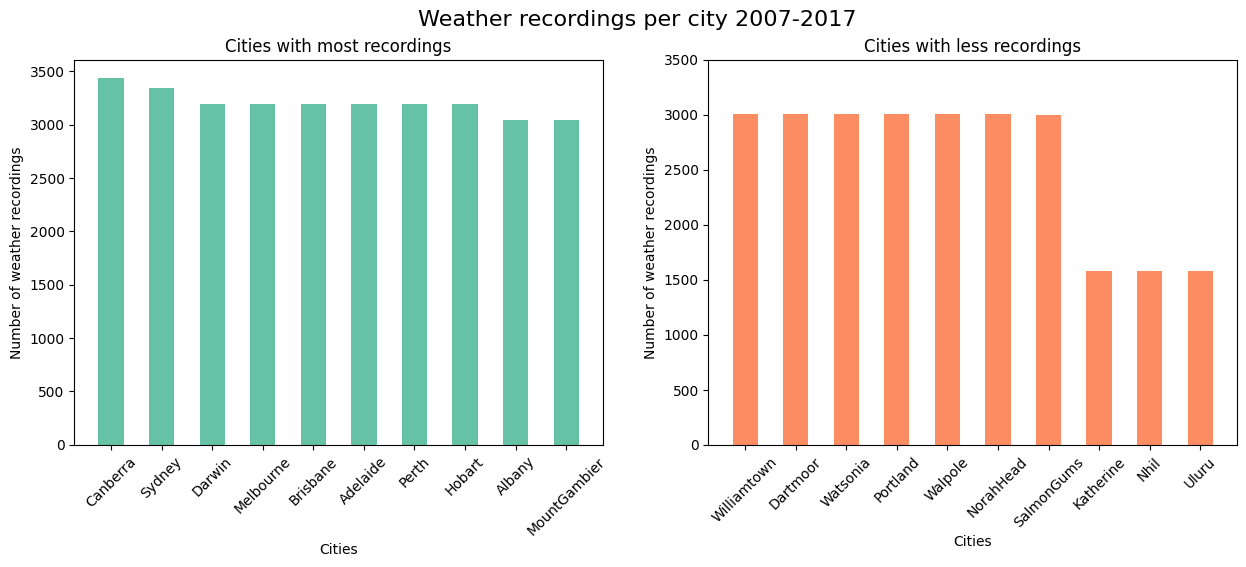

In [138]:
fig, ax= plt.subplots(1,2, figsize=(15,5))

#plot for cities with most recordings
ax[0].bar(cities_with_most_weather_recordings.index, cities_with_most_weather_recordings.values, width= 0.5, color=sb.color_palette()[0]) #reduce the columns' width in order to avoid overlappings
ax[0].set_xlabel('Cities')
ax[0].set_xticklabels(cities_with_most_weather_recordings.index, rotation=45)#rotate the labels so all the cities' names are readable
ax[0].set_ylabel('Number of weather recordings')
ax[0].set_title('Cities with most recordings')

#plot for cities with less recordings
ax[1].bar(cities_with_less_weather_recordings.index, cities_with_less_weather_recordings.values, width= 0.5, color=sb.color_palette()[1])#reduce the columns' width in order to avoid overlappings
ax[1].set_ylim(0, 3500) #set the y axis bounds in order to have both plots with the same scale
ax[1].set_xlabel('Cities')
ax[1].set_xticklabels(cities_with_less_weather_recordings.index, rotation=45)#rotate the labels so all the cities' names are readable
ax[1].set_ylabel('Number of weather recordings')
ax[1].set_title('Cities with less recordings')

fig.suptitle('Weather recordings per city 2007-2017', fontsize=16) #make the title bigger and more readable
plt.show()


What are the cities with the highest average maximum temperature during the year?

In [139]:
#cities with the highest maximum temperature 

top_10_hottest_cities=weather_australia_groupby_city.sort_values(by='maxtemp', ascending=False).head(10) #sort the values from highest to lowest according to the average maxtemp and take the first 10 cities
top_10_hottest_cities['maxtemp'] #consider only the maxtemp column



location
Katherine       34.935436
Darwin          32.540977
Uluru           30.383195
Cairns          29.558849
Townsville      29.367160
AliceSprings    29.248420
Moree           26.950548
Woomera         26.596707
Brisbane        26.448380
PearceRAAF      26.051238
Name: maxtemp, dtype: float64

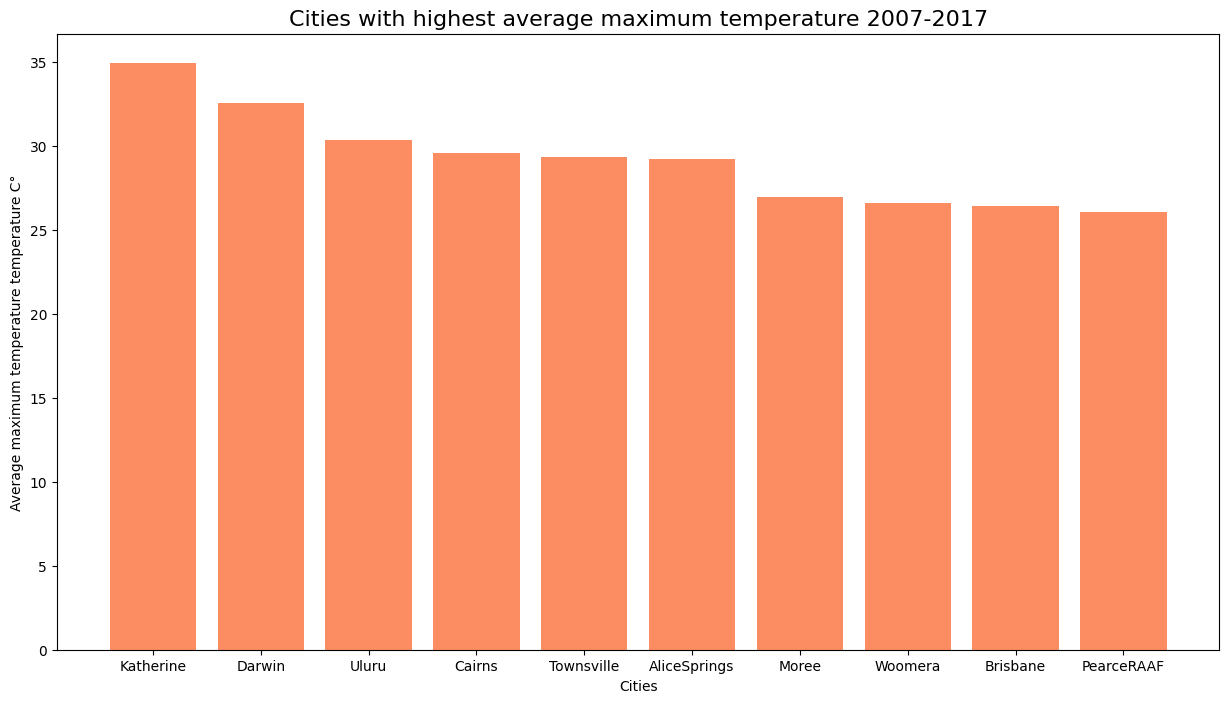

In [140]:
plt.figure(figsize=(15,8))
plt.bar(top_10_hottest_cities['maxtemp'].index, top_10_hottest_cities['maxtemp'].values, color=sb.color_palette()[1])
plt.title('Cities with highest average maximum temperature 2007-2017', fontsize=16)#make the title bigger and more readable
plt.xlabel('Cities')
plt.ylabel('Average maximum temperature temperature C°')
plt.show()

In [141]:
#another possible plot i could have used


location_of_top_10_hottest_cities=top_10_hottest_cities['maxtemp'].index
average_maxtemp_of_top_10_hottest_cities=top_10_hottest_cities['maxtemp'].values

fig=px.bar(top_10_hottest_cities, x=location_of_top_10_hottest_cities, y=average_maxtemp_of_top_10_hottest_cities, color= average_maxtemp_of_top_10_hottest_cities, labels={'x':'Cities', 'y':'Average maximum temperature C°'}, title='Cities with highest average maximum temperature 2007-2017', width=1200, height=800)
fig.update_layout(legend_title_text='Avg Max Temp C°')
fig.update_traces(hoverinfo='skip')
fig.show()

What are the cities with the lowest average minimum temperature during the year?

In [142]:
#cities with the lowest min temperature 

top_10_coldest_cities=weather_australia_groupby_city.sort_values(by='mintemp', ascending=True).head(10) #sort the values from lowest to highest according to the average mintemp and take the first 10 cities
top_10_coldest_cities['mintemp'] #consider only the mintemp column

location
MountGinini     3.577280
Canberra        6.821866
Tuggeranong     7.242133
Ballarat        7.367950
Launceston      7.836190
Sale            8.567420
Bendigo         8.593713
Dartmoor        8.620034
MountGambier    8.825477
Nhil            8.999809
Name: mintemp, dtype: float64

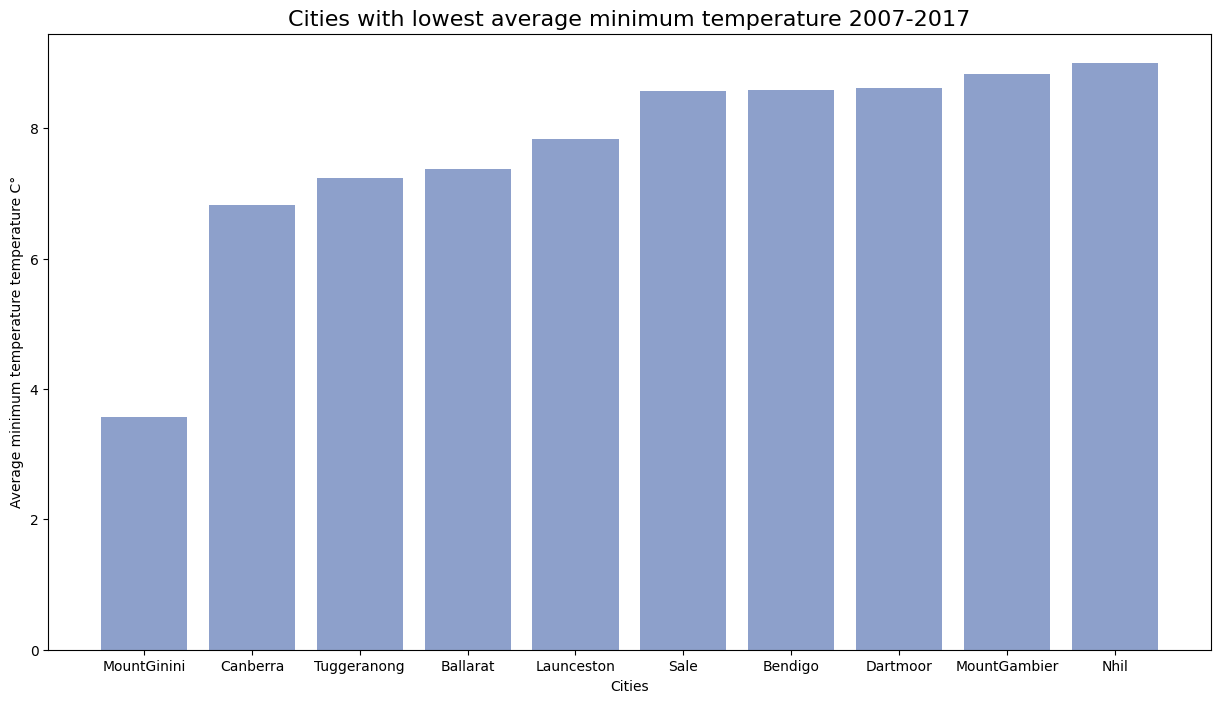

In [143]:
plt.figure(figsize=(15,8))
plt.bar(top_10_coldest_cities['mintemp'].index, top_10_coldest_cities['mintemp'].values, color=sb.color_palette()[2])
plt.title('Cities with lowest average minimum temperature 2007-2017', fontsize=16)#make the title bigger and more readable
plt.xlabel('Cities')
plt.ylabel('Average minimum temperature temperature C°')
plt.show()

What are the cities with the highest humidity during the year?

In [144]:
#cities with the highest humidity in the morning

top_10_cities_for_humidity_9am=weather_australia_groupby_city.sort_values(by='humidity9am', ascending=False).head(10) #sort the values from highest to lowest according to the average humidity at 9am and take the first 10 cities
top_10_cities_for_humidity_9am=top_10_cities_for_humidity_9am['humidity9am'] #consider only the column concerning the humidity at 9am
top_10_cities_for_humidity_9am

location
Dartmoor         85.217907
Ballarat         81.817820
Launceston       79.500000
Sale             78.918729
Portland         78.711149
Watsonia         78.383973
MountGinini      77.146697
Richmond         76.897627
BadgerysCreek    76.895770
Walpole          76.119266
Name: humidity9am, dtype: float64

In [145]:
#cities with the highest humidity in the afternoon
top_10_cities_for_humidity_3pm=weather_australia_groupby_city.sort_values(by='humidity3pm', ascending=False).head(10) #sort the values from highest to lowest according to the average humidity at 3pm and take the first 10 cities
top_10_cities_for_humidity_3pm=top_10_cities_for_humidity_3pm['humidity3pm'] #consider only the column concerning the humidity at 3pm
top_10_cities_for_humidity_3pm

location
MountGinini      69.722609
NorfolkIsland    67.836714
NorahHead        67.521198
Albany           67.407917
Walpole          66.316022
Portland         65.991656
Wollongong       65.128571
GoldCoast        62.980515
Dartmoor         62.456537
CoffsHarbour     62.351858
Name: humidity3pm, dtype: float64

The cities with highest humidity recordings in the morning are not the same cities with highest humidity recordings in the afternoon.
So I create 2 subplots to make a comparison among these two groups of cities.

C:\Users\loren\AppData\Local\Temp\ipykernel_7232\2503715595.py:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\loren\AppData\Local\Temp\ipykernel_7232\2503715595.py:12: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



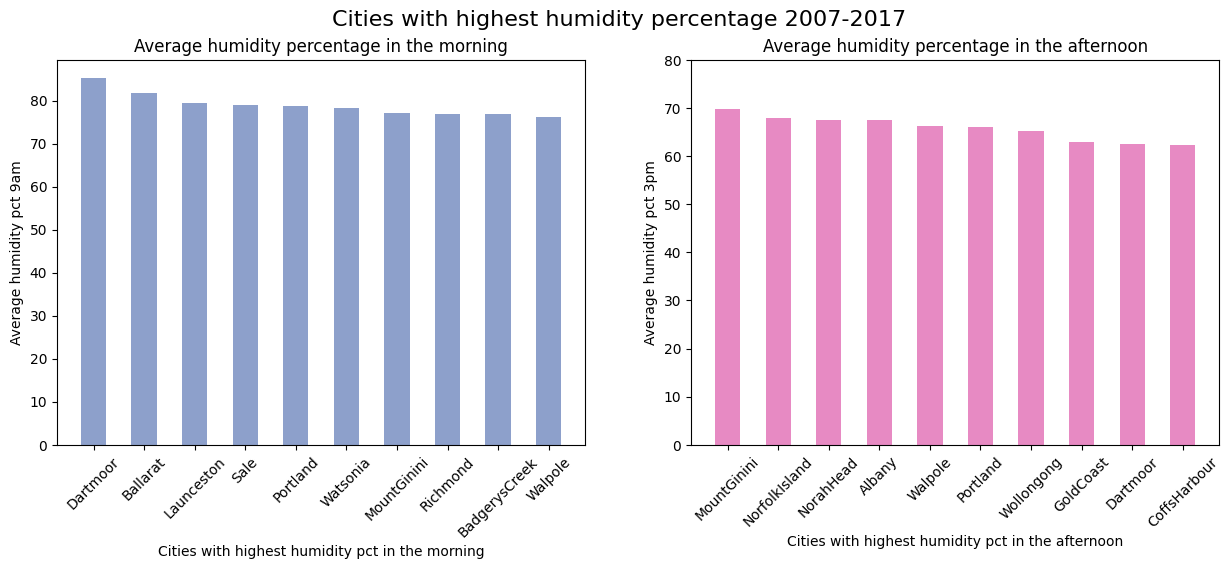

In [146]:
fig, ax =plt.subplots(1,2, figsize=(15,5))

ax[0].bar(top_10_cities_for_humidity_9am.index, top_10_cities_for_humidity_9am.values, width=0.5, color=sb.color_palette()[2])
ax[0].set_xlabel('Cities with highest humidity pct in the morning')
ax[0].set_xticklabels(top_10_cities_for_humidity_9am.index, rotation=45)
ax[0].set_ylabel('Average humidity pct 9am')
ax[0].set_title('Average humidity percentage in the morning')


ax[1].bar(top_10_cities_for_humidity_3pm.index, top_10_cities_for_humidity_3pm.values, width=0.5, color=sb.color_palette()[3])
ax[1].set_xlabel('Cities with highest humidity pct in the afternoon')
ax[1].set_xticklabels(top_10_cities_for_humidity_3pm.index, rotation=45)
ax[1].set_ylabel('Average humidity pct 3pm')
ax[1].set_ylim(0, 80) #set the y axis bounds in order to have both plots with the same scale
ax[1].set_title('Average humidity percentage in the afternoon')



fig.suptitle('Cities with highest humidity percentage 2007-2017', fontsize=16)#make the title bigger and more readable
plt.show()

What are the most rainy cities?

In order to discover what is the most rainy city I am going to compute the percentage of rainy days over the total number of weather recordings for each city.
In order to accomplish this task, I will first map the values of 'raintoday' column No-->0 Yes-->1, then I will group the dataframe by the location summing the numeric values.
Finally,I will compute the ration between rainy days and weather recording per city. 

In [147]:
#I am going to make some mofidications to the dataframe, so I create a copy to work with
weather_australia_modified=weather_australia_df.copy()

In [148]:
#I map the values of the 'raintoday'column No-->0 Yes-->1
weather_australia_modified['raintoday']=weather_australia_modified['raintoday'].replace({'No':0, 'Yes':1}) 
weather_australia_modified

,date,location,mintemp,maxtemp,rainfall,windgustspeed,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,temp9am,temp3pm,raintoday,raintomorrow
0,2008-12-01,Albury,13.4,22.900000,0.6,44.00000,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,No
1,2008-12-02,Albury,7.4,25.100000,0.0,44.00000,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,No
2,2008-12-03,Albury,12.9,25.700000,0.0,46.00000,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,No
3,2008-12-04,Albury,9.2,28.000000,0.0,24.00000,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,No
4,2008-12-05,Albury,17.5,32.300000,1.0,41.00000,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.400000,0.0,31.00000,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0,No
145456,2017-06-22,Uluru,3.6,25.300000,0.0,22.00000,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0,No
145457,2017-06-23,Uluru,5.4,26.900000,0.0,37.00000,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0,No
145458,2017-06-24,Uluru,7.8,27.000000,0.0,28.00000,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,0,No


In [149]:
#I am interested in considering the 'locaiton' and 'raintoday' columns only 
weather_australia_groupby_city_sum_raintoday=weather_australia_modified[['location', 'raintoday']].groupby('location').sum() #I group the dataframe by location and sum the values 
weather_australia_groupby_city_sum_raintoday

,raintoday
location,
Adelaide,689
Albany,902
Albury,617
AliceSprings,244
BadgerysCreek,583
Ballarat,781
Bendigo,562
Brisbane,709
Cairns,950


In [150]:
#Since the cities do not have the same number of weather recordings, I must take into account not only the number of rainy days but also the number of recordings

weather_recordings_per_city #the variable was alerady been created

location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown     

In [151]:
#I concatenete the two Series of weather recordings and rainy days for each city
pd.concat([weather_recordings_per_city, weather_australia_groupby_city_sum_raintoday ], axis=1)
rainy_days_per_location_df= pd.concat([weather_recordings_per_city, weather_australia_groupby_city_sum_raintoday ], axis=1) #assign a name to the df
rainy_days_per_location_df.columns=['weather_recordings', 'rainy_days'] #give new names to columns
rainy_days_per_location_df

,weather_recordings,rainy_days
location,,
Canberra,3436,629
Sydney,3344,866
Darwin,3193,852
Melbourne,3193,636
Brisbane,3193,709
Adelaide,3193,689
Perth,3193,645
Hobart,3193,762
Albany,3040,902


In [152]:
#create a new column showing the ratio between rainy days and weather recordings per city. Those city with the highest ration can be considered the most rainy cities

rainy_days_per_location_df['pct_of_rainy_days']=round(rainy_days_per_location_df['rainy_days']/rainy_days_per_location_df['weather_recordings'], 2) #round the ration to the second decimal place
rainy_days_per_location_df

,weather_recordings,rainy_days,pct_of_rainy_days
location,,,
Canberra,3436,629,0.18
Sydney,3344,866,0.26
Darwin,3193,852,0.27
Melbourne,3193,636,0.20
Brisbane,3193,709,0.22
Adelaide,3193,689,0.22
Perth,3193,645,0.20
Hobart,3193,762,0.24
Albany,3040,902,0.30


In [153]:
top_10_cities_for_rainy_days=rainy_days_per_location_df['pct_of_rainy_days'].sort_values(ascending=False).head(10) #select the top 10 cities with highest percentage of rainy days
top_10_cities_for_rainy_days

location
Portland         0.36
Walpole          0.32
Cairns           0.31
Dartmoor         0.31
NorfolkIsland    0.31
Albany           0.30
MountGambier     0.30
CoffsHarbour     0.29
Witchcliffe      0.29
MountGinini      0.27
Name: pct_of_rainy_days, dtype: float64

In [154]:
top_10_cities_for_drought_days=rainy_days_per_location_df['pct_of_rainy_days'].sort_values(ascending=False).tail(10) #select the top 10 cities with lowest percentage of rainy days
top_10_cities_for_drought_days

location
Townsville      0.17
Katherine       0.17
SalmonGums      0.16
Nhil            0.15
Moree           0.13
Cobar           0.13
Mildura         0.11
AliceSprings    0.08
Woomera         0.07
Uluru           0.07
Name: pct_of_rainy_days, dtype: float64

C:\Users\loren\AppData\Local\Temp\ipykernel_7232\3228159098.py:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\loren\AppData\Local\Temp\ipykernel_7232\3228159098.py:12: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



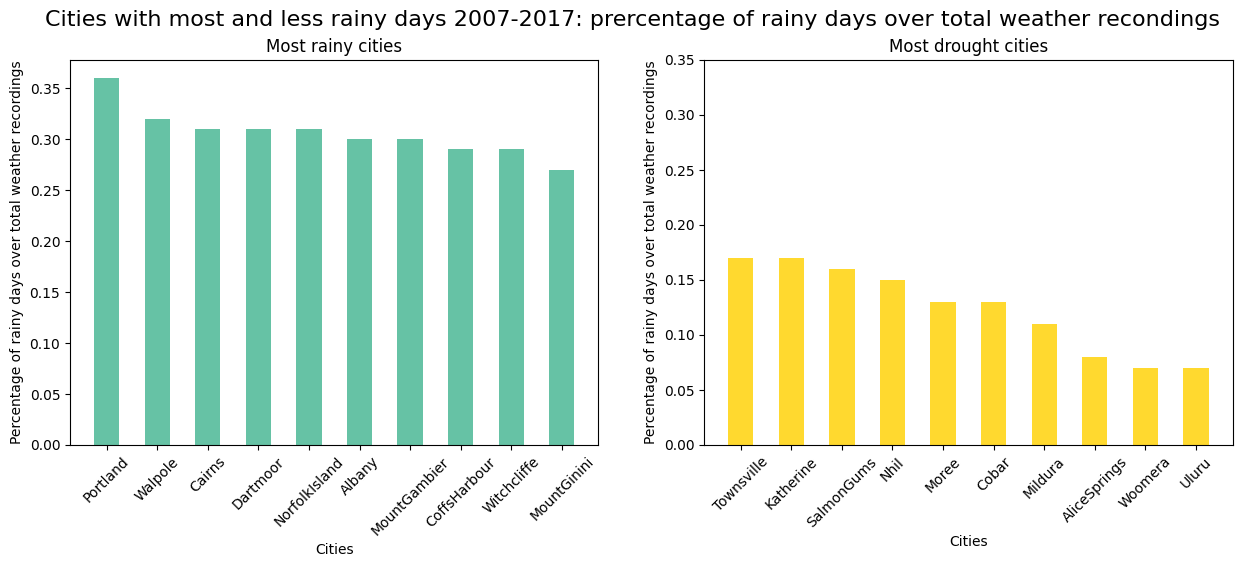

In [155]:
fig, ax =plt.subplots(1,2, figsize=(15,5))

ax[0].bar(top_10_cities_for_rainy_days.index, top_10_cities_for_rainy_days.values, width=0.5, color=sb.color_palette()[0])
ax[0].set_xlabel('Cities')
ax[0].set_xticklabels(top_10_cities_for_rainy_days.index, rotation=45)
ax[0].set_ylabel('Percentage of rainy days over total weather recordings')
ax[0].set_title('Most rainy cities')


ax[1].bar(top_10_cities_for_drought_days.index, top_10_cities_for_drought_days.values, width=0.5, color=sb.color_palette()[5])
ax[1].set_xlabel('Cities')
ax[1].set_xticklabels(top_10_cities_for_drought_days.index, rotation=45)
ax[1].set_ylabel('Percentage of rainy days over total weather recordings')
ax[1].set_ylim(0, 0.35) #set the y axis bounds in order to have both plots with the same scale
ax[1].set_title('Most drought cities')



fig.suptitle('Cities with most and less rainy days 2007-2017: prercentage of rainy days over total weather recondings', fontsize=16)#make the title bigger and more readable
plt.show()

What are the cities with highest average mm of rain?

I want to explore whether or not those cities that have the highest percentage of rainy days are also the cities with highest average mm of rain. If not, this would mean that some cities are subject to occasional but strong rainfalls.


In [156]:
cities_sorted_by_mm_of_rain= weather_australia_groupby_city['rainfall'].sort_values( ascending=False)#sort the cities by their average mm of rain
cities_sorted_by_mm_of_rain

location
Cairns              5.742035
Darwin              5.092452
CoffsHarbour        5.061497
GoldCoast           3.769396
Wollongong          3.594903
Williamtown         3.591108
Townsville          3.485592
NorahHead           3.387299
Sydney              3.324543
MountGinini         3.292260
Katherine           3.201090
Newcastle           3.183892
Brisbane            3.144891
NorfolkIsland       3.127665
SydneyAirport       3.009917
Walpole             2.906846
Witchcliffe         2.895664
Portland            2.530374
Albany              2.263859
BadgerysCreek       2.193101
Penrith             2.175304
Tuggeranong         2.164043
Dartmoor            2.146567
Richmond            2.138462
MountGambier        2.087562
Launceston          2.011988
Albury              1.914115
Perth               1.906295
Melbourne           1.870062
Watsonia            1.860820
PerthAirport        1.761648
Canberra            1.741720
Ballarat            1.740026
WaggaWagga          1.709946
Pearc

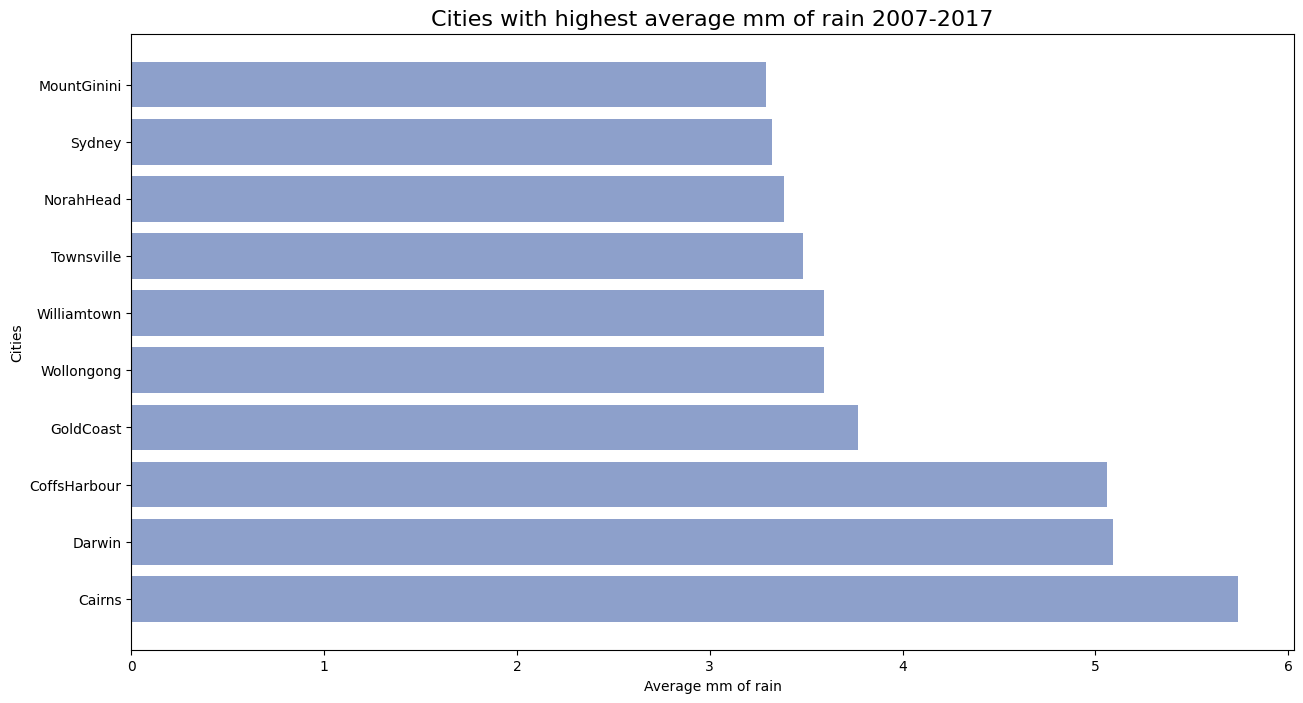

In [157]:
#select the top 10 cities by average mm of rain
top_10_cities_for_mm_of_rain= weather_australia_groupby_city['rainfall'].sort_values( ascending=False).head(10)
top_10_cities_for_mm_of_rain

#create the plot of top 10 cities with highest average mm of rain
plt.figure(figsize=(15,8))
plt.barh(top_10_cities_for_mm_of_rain.index,top_10_cities_for_mm_of_rain.values, color=sb.color_palette()[2])#horizontal bar plot
plt.title('Cities with highest average mm of rain 2007-2017', fontsize=16)#make the title bigger and more readable
plt.xlabel('Average mm of rain')
plt.ylabel('Cities')
plt.show()



Explore whether the most rainy city, which are the locations with the highest percentage of rainy days, are also the cities with highest averge mm of rain.

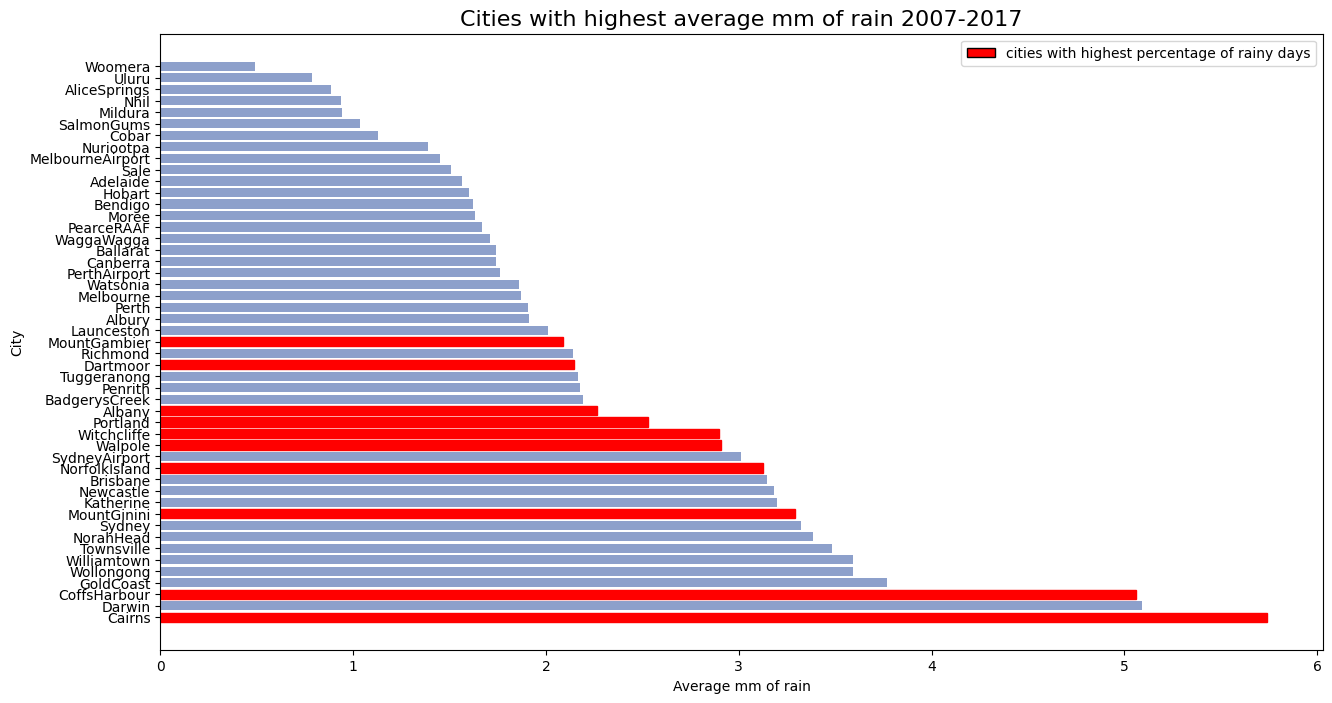

In [162]:
plt.figure(figsize=(15,8))
figure=plt.barh(cities_sorted_by_mm_of_rain.index, cities_sorted_by_mm_of_rain.values, color=sb.color_palette()[2])#use horizontal barchart
plt.title('Cities with highest average mm of rain 2007-2017', fontsize=16)#make the title bigger and more readable
plt.xlabel('Average mm of rain')
plt.ylabel('City')


#color in red those cities that belongs to the top 10 rainy cities group

for i, city in enumerate(cities_sorted_by_mm_of_rain.index): #iterate on every city and on its index
    if city in top_10_cities_for_rainy_days.index: #if the city belongs to the top 10 rainy city group, it is colred in red
        figure[i].set_color('red')#color the city according to its index poistion in top_10_cities_for_mm_of_rain.index
        
 #create a legend       
plt.legend([plt.Rectangle((0,0),1,1, fc='red', edgecolor='black')], ['cities with highest percentage of rainy days'])
plt.show()

Only some cities like Cairns, CoffsHarbor, MountiGinini are locations in which it often rains and rainfalls are strong.


In other cities like Darwin, GoldCoast and Wollongong rainfalls are more occasional but on averge more stronger.

In [ ]:
#plotta in 6 subplots tutto quello sopra per far vedere l'alternativa

In [ ]:
#evaluate the weather--> best weather city, worst weather city

**Relevant weather recordings**

Where and when were the highest temperatures recorded?

In [ ]:
#sort the maximum temperatures from highest to lowest
sorted_maxtemp=weather_australia_df.sort_values(by='maxtemp', ascending=False)

#take the 5 highest maximum temperatures
top_5_higest_maxtemp=sorted_maxtemp.head(5)
top_5_higest_maxtemp

#use the top_5_higest_maxtemp as a mask
top_5_higest_maxtemp['maxtemp']


106316    48.1
14942     47.3
13806     47.3
30041     47.0
27032     46.9
Name: maxtemp, dtype: float64

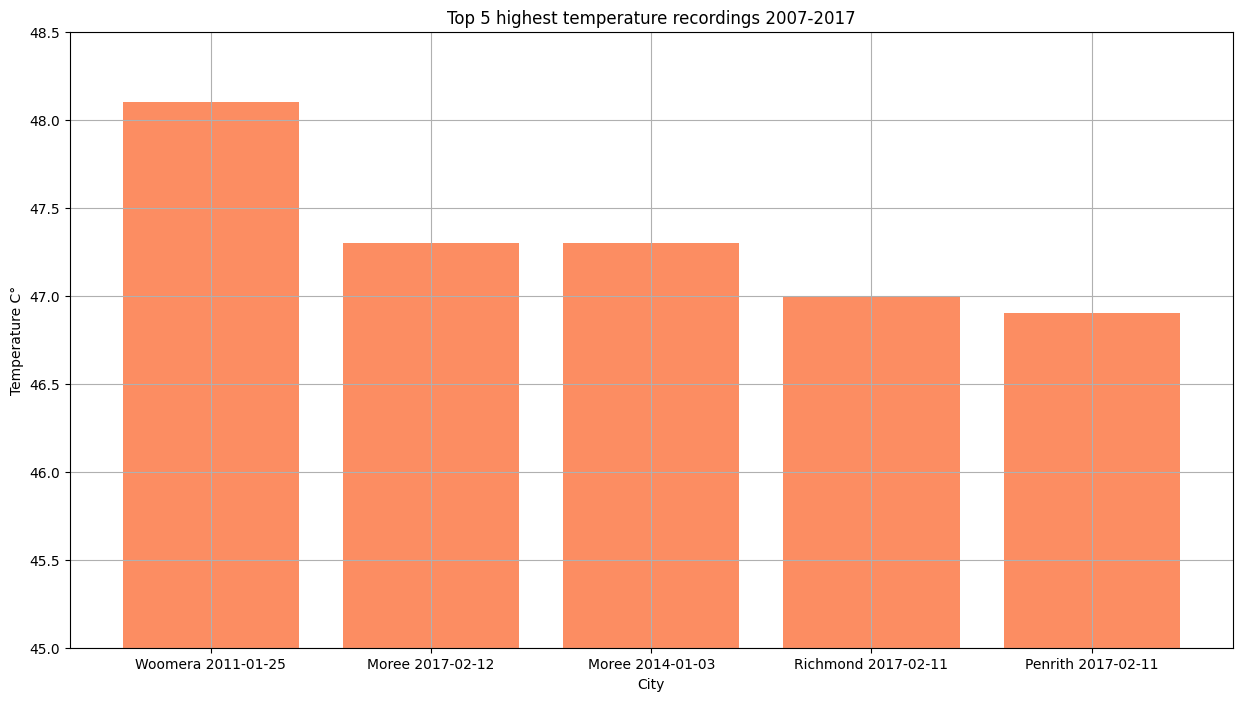

In [ ]:
#on the x axis I want to show both the city and the date of the recording, so I concatenate the 2 pandas series
x_axis_combined_for_top_5_highest_temperature= top_5_higest_maxtemp['location'] + ' ' + top_5_higest_maxtemp['date'].astype(str)
#on the y axis jyst the temperarure is shown
y_axis_for_top_5_highest_temperature= top_5_higest_maxtemp['maxtemp']

plt.figure(figsize=(15,8))
plt.bar(x_axis_combined_for_top_5_highest_temperature, y_axis_for_top_5_highest_temperature, color=sb.color_palette()[1])
plt.ylim(45, 48.5) #set the bounds of the y axis from 45 to 49 in order to better see values' differences
plt.grid()
plt.xlabel('City')
plt.ylabel('Temperature C°')
plt.title('Top 5 highest temperature recordings 2007-2017')


plt.show()

Where and when were the lowest temperatures recorded?

In [ ]:
#sort the minimum temperatures from lowest to highest
sorted_mintemp=weather_australia_df.sort_values(by='mintemp', ascending=True)
#take the 5 highest maximum temperatures
top_5_lowest_mintemp=sorted_mintemp.head(5)
top_5_lowest_mintemp

#use the top_5_higest_maxtemp as a mask
top_5_lowest_mintemp['mintemp']



52254   -8.5
49963   -8.2
54410   -8.2
52637   -8.0
46923   -8.0
Name: mintemp, dtype: float64

Text(0.5, 1.0, 'Top 5 lowest temperature recordings 2007-2017')

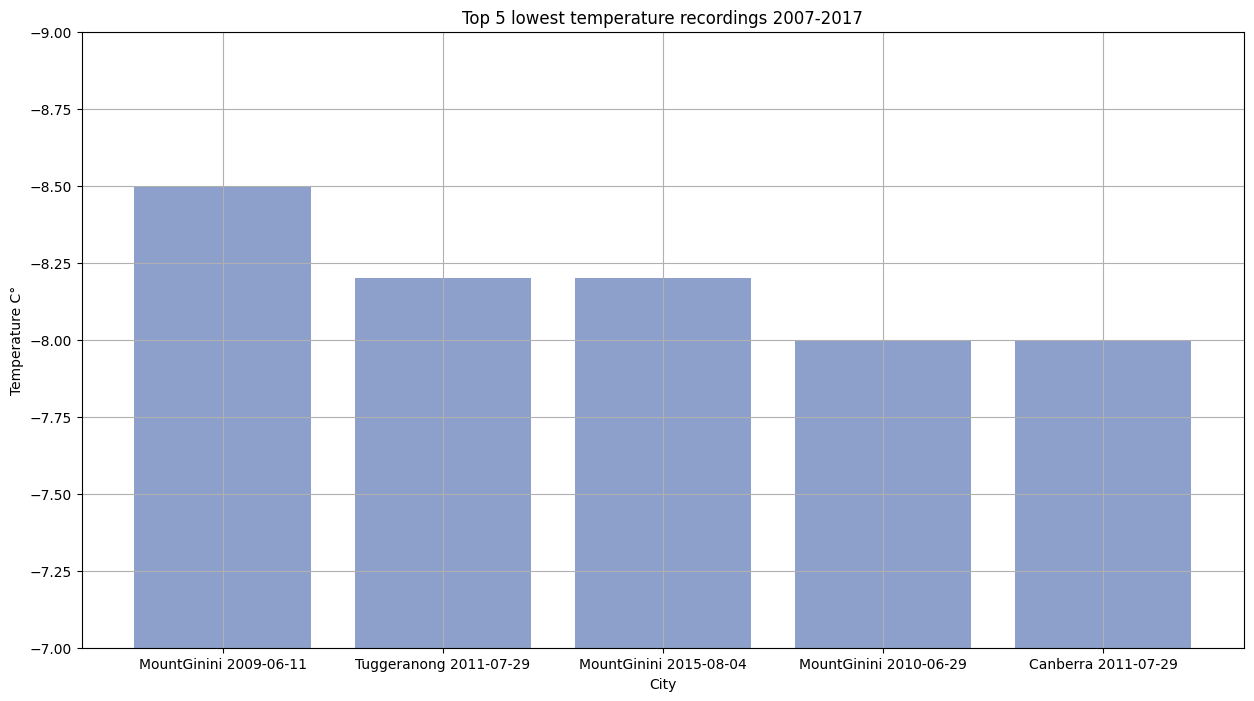

In [ ]:
#on the x axis I want to show both the city and the date of the recording, so I concatenate the 2 pandas series
x_axis_combined_for_top_5_lowest_temperature= top_5_lowest_mintemp['location'] + ' ' + top_5_lowest_mintemp['date'].astype(str)
#on the y axis jyst the temperarure is shown
y_axis_for_top_5_lowest_temperature= top_5_lowest_mintemp['mintemp']

plt.figure(figsize=(15,8))
plt.bar(x_axis_combined_for_top_5_lowest_temperature, y_axis_for_top_5_lowest_temperature, color=sb.color_palette()[2])
plt.ylim(-7, -9) #set the bounds of the y axis from -7 to -9 in order to better see values' differences
plt.grid()
plt.xlabel('City')
plt.ylabel('Temperature C°')
plt.title('Top 5 lowest temperature recordings 2007-2017')

Where did the strongest thunderstorms occur ?

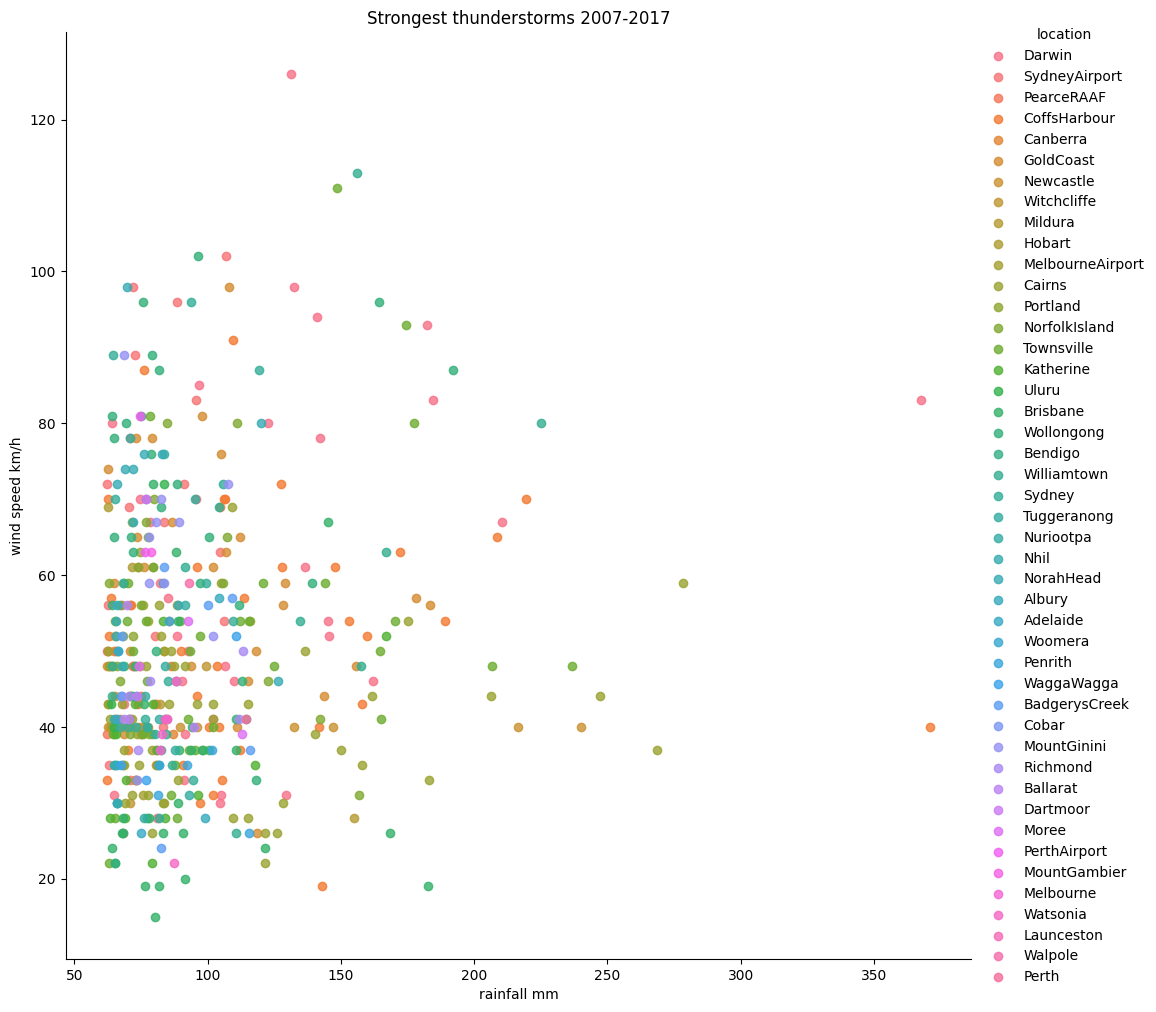

In [ ]:
top_500_thundestorms_by_rainfall=weather_australia_df.sort_values(by='rainfall', ascending=True).tail(500) #sort the 500 highest recordings by rainfall
top_500_thundestorms_by_rainfall['rainfall'] #select the series 
top_500_thundestorms_by_rainfall['windgustspeed']

#create the plot with seaborn: with 'hue' argument is possible to assign different colors to the cities
sb.lmplot(x='rainfall', y='windgustspeed', data=top_500_thundestorms_by_rainfall, fit_reg=False,  hue='location', legend=True, height=10)
plt.title('Strongest thunderstorms 2007-2017')
plt.xlabel('rainfall mm')
plt.ylabel('wind speed km/h')
plt.show()